In [1]:
import pandas as pd
import dateutil as dt

In [2]:
#d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
# Define a custom date parser function
def d_parser(x):
    return pd.to_datetime(x, format='%Y-%m-%d %I-%p')
#df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)
# Read the CSV file with parse_dates and date_format
df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

In [3]:
df.shape

(23674, 7)

In [4]:
df.head(5)

Date  Symbol    Open    High     Low   Close      Volume
0 2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93
1 2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09
2 2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81
3 2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92
4 2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71

In [5]:
df.loc[0, 'Date'].day_name()

'Friday'

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [7]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [8]:
df.loc[0, 'Date'].day_name()

'Friday'

In [9]:
df['DayOfWeek'] = df.loc[0, 'Date'].day_name()

In [10]:
df['DayOfWeek'].shape

(23674,)

In [11]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [12]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [13]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [14]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
1749  2019-12-31 23:00:00  ETHUSD  128.33  128.69  128.14  128.54   440678.91   
1750  2019-12-31 22:00:00  ETHUSD  128.38  128.69  127.95  128.33   554646.02   
1751  2019-12-31 21:00:00  ETHUSD  127.86  128.43  127.72  128.38   350155.69   
1752  2019-12-31 20:00:00  ETHUSD  127.84  128.34  127.71  127.86   428183.38   
1753  2019-12-31 19:00:00  ETHUSD  128.69  128.69  127.60  127.84  1169847.84   
...                   ...     ...     ...     ...     ...     ...         ...   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
10508 2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

      DayOfWeek  
1749     Friday  
1750     Friday  
1751     Friday  
1752     Friday  
1753     Friday  
...         ...  
10504    Friday  
10505    Friday  
10506    Friday  
10507    Friday  
10508    Friday  

[8760 rows x 8 columns]

In [15]:
filt = (df['Date'] >= pd.to_datetime('2019')) & (df['Date'] >= pd.to_datetime('2020'))
df.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
0    2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1    2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2    2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3    2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4    2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                  ...     ...     ...     ...     ...     ...         ...   
1744 2020-01-01 04:00:00  ETHUSD  129.57  130.00  129.50  129.56   702786.82   
1745 2020-01-01 03:00:00  ETHUSD  130.37  130.44  129.38  129.57   496704.23   
1746 2020-01-01 02:00:00  ETHUSD  130.14  130.50  129.91  130.37   396315.72   
1747 2020-01-01 01:00:00  ETHUSD  128.34  130.14  128.32  130.14   635419.40   
1748 2020-01-01 00:00:00  ETHUSD  128.54  128.54  128.12  128.34   245119.91   

     DayOfWeek  
0       Friday  
1       Friday  
2       Friday  
3       Friday  
4       Friday  
...        ...  
1744    Friday  
1745    Friday  
1746    Friday  
1747    Friday  
1748    Friday  

[1749 rows x 8 columns]

In [16]:
df.set_index('Date', inplace=True)

In [17]:
df

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                     ...     ...     ...     ...     ...         ...   
2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

                    DayOfWeek  
Date                           
2020-03-13 20:00:00    Friday  
2020-03-13 19:00:00    Friday  
2020-03-13 18:00:00    Friday  
2020-03-13 17:00:00    Friday  
2020-03-13 16:00:00    Friday  
...                       ...  
2017-07-01 15:00:00    Friday  
2017-07-01 14:00:00    Friday  
2017-07-01 13:00:00    Friday  
2017-07-01 12:00:00    Friday  
2017-07-01 11:00:00    Friday  

[23674 rows x 7 columns]

In [27]:
df.loc['2019']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2019-12-31 23:00:00  ETHUSD  128.33  128.69  128.14  128.54   440678.91   
2019-12-31 22:00:00  ETHUSD  128.38  128.69  127.95  128.33   554646.02   
2019-12-31 21:00:00  ETHUSD  127.86  128.43  127.72  128.38   350155.69   
2019-12-31 20:00:00  ETHUSD  127.84  128.34  127.71  127.86   428183.38   
2019-12-31 19:00:00  ETHUSD  128.69  128.69  127.60  127.84  1169847.84   
...                     ...     ...     ...     ...     ...         ...   
2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

                    DayOfWeek  
Date                           
2019-12-31 23:00:00    Friday  
2019-12-31 22:00:00    Friday  
2019-12-31 21:00:00    Friday  
2019-12-31 20:00:00    Friday  
2019-12-31 19:00:00    Friday  
...                       ...  
2019-01-01 04:00:00    Friday  
2019-01-01 03:00:00    Friday  
2019-01-01 02:00:00    Friday  
2019-01-01 01:00:00    Friday  
2019-01-01 00:00:00    Friday  

[8760 rows x 7 columns]

In [28]:
df.loc['2020-01' : '2020-02']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-02-29 23:00:00  ETHUSD  223.35  223.58  216.83  217.31  1927939.88   
2020-02-29 22:00:00  ETHUSD  223.48  223.59  222.14  223.35   535998.57   
2020-02-29 21:00:00  ETHUSD  224.63  225.14  222.74  223.48   561158.03   
2020-02-29 20:00:00  ETHUSD  225.31  225.33  223.50  224.63   511648.65   
2020-02-29 19:00:00  ETHUSD  225.09  225.85  223.87  225.31  1250856.20   
...                     ...     ...     ...     ...     ...         ...   
2020-01-01 04:00:00  ETHUSD  129.57  130.00  129.50  129.56   702786.82   
2020-01-01 03:00:00  ETHUSD  130.37  130.44  129.38  129.57   496704.23   
2020-01-01 02:00:00  ETHUSD  130.14  130.50  129.91  130.37   396315.72   
2020-01-01 01:00:00  ETHUSD  128.34  130.14  128.32  130.14   635419.40   
2020-01-01 00:00:00  ETHUSD  128.54  128.54  128.12  128.34   245119.91   

                    DayOfWeek  
Date                           
2020-02-29 23:00:00    Friday  
2020-02-29 22:00:00    Friday  
2020-02-29 21:00:00    Friday  
2020-02-29 20:00:00    Friday  
2020-02-29 19:00:00    Friday  
...                       ...  
2020-01-01 04:00:00    Friday  
2020-01-01 03:00:00    Friday  
2020-01-01 02:00:00    Friday  
2020-01-01 01:00:00    Friday  
2020-01-01 00:00:00    Friday  

[1440 rows x 7 columns]

In [65]:
df.loc['2020-01' : '2020-02']['Close'].mean()

195.1655902777778

In [76]:
df.loc['2020-01-1']['High'].max()

132.68

In [70]:
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [71]:
%matplotlib inline

<Axes: xlabel='Date'>

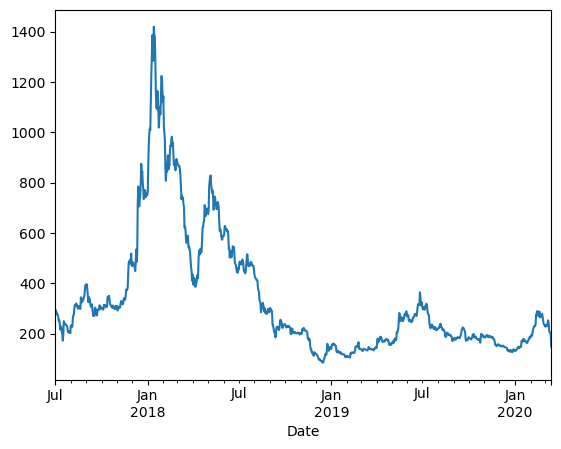

In [72]:
highs.plot()

In [77]:
df.resample('W').agg({'Close': 'mean','High': 'max','Low': 'min','Volume': 'sum'})

Close    High     Low        Volume
Date                                                
2017-07-02  268.202162  293.73  253.23  8.084631e+07
2017-07-09  261.062083  285.00  231.25  2.246746e+08
2017-07-16  195.698393  240.33  130.26  5.017750e+08
2017-07-23  212.783750  249.40  153.25  7.221637e+08
2017-07-30  203.309524  229.99  178.03  2.657305e+08
...                ...     ...     ...           ...
2020-02-16  255.198452  290.00  216.31  3.912867e+08
2020-02-23  265.321905  287.13  242.36  3.067838e+08
2020-03-01  236.373988  278.13  209.26  3.693920e+08
2020-03-08  229.817619  253.01  196.00  2.736569e+08
2020-03-15  176.332821  208.65   90.00  4.983998e+08

[142 rows x 4 columns]